In [1]:
#Dataset: Tweets (labeled as positive, negative, neutral)
#Build a classifier

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score


In [6]:
df_original = pd.read_csv(r"data\AirlineTweets.csv")

In [7]:
df_original.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
df = df_original[['airline_sentiment', 'text']].copy()

In [9]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [12]:
df['airline_sentiment'].value_counts() #imbalanced dataset, negative class is overrepresented

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [13]:
target_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df["target"] = df.airline_sentiment.replace(target_mapping)

In [14]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [15]:
df_train, df_test = train_test_split(df)

In [18]:
df_train.shape, df_test.shape

((10980, 3), (3660, 3))

In [19]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

In [20]:
X_train = vectorizer.fit_transform(df_train.text)

In [21]:
X_train

<10980x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 245164 stored elements in Compressed Sparse Row format>

In [22]:
X_test = vectorizer.transform(df_test.text)

In [23]:
Y_train = df_train.target
Y_test = df_test.target

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train Accuracy:", model.score(X_train, Y_train))
print("Test Accuracy:", model.score(X_test, Y_test))

Train Accuracy: 0.8877959927140255
Test Accuracy: 0.8027322404371585


In [25]:
pred_train = model.predict_proba(X_train)#[:,1] we keep all the columns for  the roc_auc_score
pred_test = model.predict_proba(X_test)#[:,1]
print("Train AUC:", roc_auc_score(Y_train, pred_train, multi_class='ovo')) #one vs one (ovo) opposed to one vs rest (ovr)
print("Test AUC:", roc_auc_score(Y_test, pred_test, multi_class='ovo')) #binary metrics to multiclass metrics

Train AUC: 0.9719100427359867
Test AUC: 0.8932808106120715


In [26]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

In [27]:
cm = confusion_matrix(Y_train, p_train, normalize='true') #each row of the matrix summed to 1
cm

array([[0.98190309, 0.01430239, 0.00379451],
       [0.25817556, 0.71041308, 0.03141136],
       [0.17350333, 0.06762749, 0.75886918]])

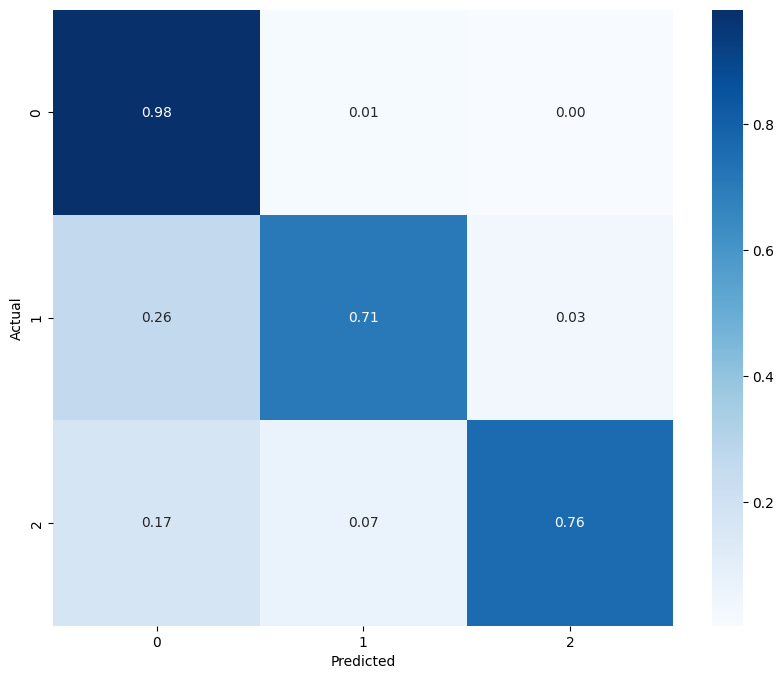

In [28]:
#plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
    

In [29]:
#negative class is overrepresented, so the model is biased towards negative class

In [30]:
cm_test = confusion_matrix(Y_test, p_test, normalize='true')
cm_test
    

array([[0.95227859, 0.03396389, 0.01375752],
       [0.43483871, 0.51096774, 0.05419355],
       [0.30948122, 0.10554562, 0.58497317]])

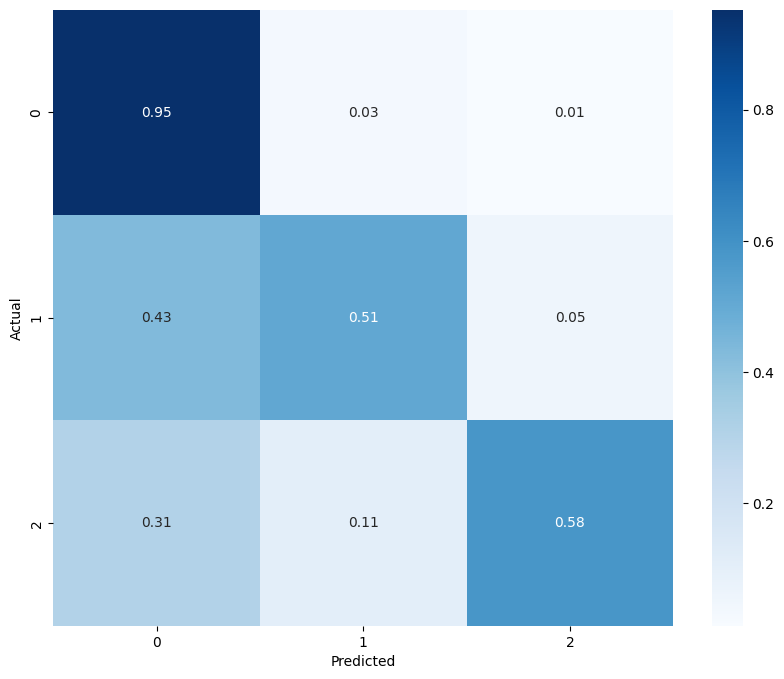

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
    

In [ ]:
#binary labels

In [32]:
binary_target_list = [target_mapping['negative'], target_mapping['positive']]
df_binary_train = df_train[df_train.target.isin(binary_target_list)]
df_binary_test = df_test[df_test.target.isin(binary_target_list)]

In [33]:
df_binary_train

,airline_sentiment,text,target
13403,negative,@AmericanAir how do I redeem a travel voucher ...,0
10296,negative,@USAirways Are you guys awake? Need help with ...,0
4462,positive,@SouthwestAir thanks to Ella-Mae at LAS counte...,2
7911,negative,@JetBlue why won't the site let me book ticket...,0
4914,negative,@SouthwestAir should get their shit together b...,0
...,...,...,...
6017,positive,@SouthwestAir Hi Guys good morning how are you...,2
709,positive,@united Thank you for the cheese platter and a...,2
10679,negative,@USAirways How dirty does the damn plane have ...,0
8366,negative,@JetBlue Apparently the pilot had made some an...,0


In [34]:
X_train_binary = vectorizer.transform(df_binary_train.text)
X_test_binary = vectorizer.transform(df_binary_test.text)

In [35]:
Y_train_binary = df_binary_train.target
Y_test_binary = df_binary_test.target

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_binary, Y_train_binary)
print("Train Accuracy:", model.score(X_train_binary, Y_train_binary))
print("Test Accuracy:", model.score(X_test_binary, Y_test_binary))
    

Train Accuracy: 0.9287199630314233
Test Accuracy: 0.9064124783362218


In [39]:
pred_train_binary = model.predict_proba(X_train_binary)[:,1] #binary so we only need thee column in index 1
pred_test_binary = model.predict_proba(X_test_binary)[:,1]
print("Train AUC:", roc_auc_score(Y_train_binary, pred_train_binary))
print("Test AUC:", roc_auc_score(Y_test_binary, pred_test_binary))

Train AUC: 0.9881090603614203
Test AUC: 0.9549388802323274


In [40]:
model.coef_ 

array([[-0.26416576,  0.27043579, -0.18949578, ..., -0.63852873,
        -0.12466488, -0.03109424]])

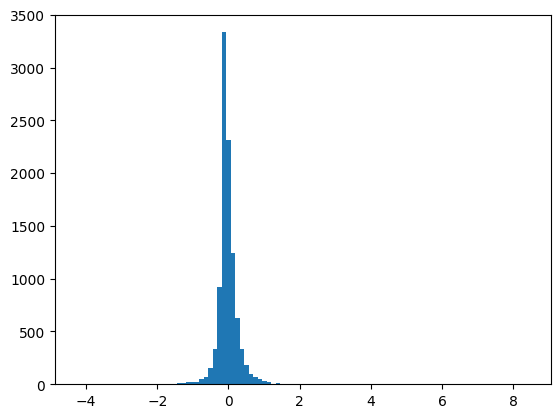

In [42]:
plt.hist(model.coef_[0], bins=100);

In [43]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'americanair': 482,
 'how': 3998,
 'do': 2372,
 'redeem': 6663,
 'travel': 8640,
 'voucher': 9191,
 'for': 3089,
 'flight': 2835,
 'if': 4073,
 'can': 1613,
 'reach': 6599,
 'agent': 335,
 'by': 1555,
 'phone': 6293,
 'my': 5341,
 'hold': 3876,
 'in': 4114,
 '24': 74,
 'hours': 3969,
 'americanair how': 521,
 'how do': 4005,
 'voucher for': 9193,
 'for flight': 3134,
 'flight if': 2880,
 'if can': 4075,
 'can reach': 1648,
 'travel agent': 8642,
 'by phone': 1562,
 '24 hours': 76,
 'usairways': 8985,
 'are': 892,
 'you': 9789,
 'guys': 3603,
 'need': 5483,
 'help': 3793,
 'with': 9609,
 'delayed': 2190,
 'to': 8253,
 'get': 3390,
 'on': 5912,
 'late': 4750,
 'flightr': 2984,
 'from': 3267,
 'phl': 6289,
 'usairways are': 8997,
 'are you': 933,
 'you guys': 9841,
 'need help': 5487,
 'help with': 3815,
 'delayed flight': 2200,
 'flight to': 2919,
 'to get': 8367,
 'on late': 5958,
 'late flightr': 4753,
 'flightr flight': 2986,
 'flight from': 2871,
 'from phl': 3313,
 'pass': 6213,
 '

In [44]:
#find most extreme words for positive and negative classes

In [45]:
threshold = 2

print("Positive words:")
for word, index in word_index_map.items():
    if model.coef_[0][index] > threshold:
        print(word, model.coef_[0][index])

Positive words:
southwestair 3.2879034939913683
thanks 8.427056405506283
jetblue 3.914064175998026
awesome 4.24078433278421
good 2.6790144046620123
excellent 2.244797585220227
best 3.153881080690651
the best 2.70824610631384
virginamerica 3.77001967907693
thank 5.809173099600416
thank you 5.284001579755398
great 5.576536859351493
love 4.3700343858107535
amazing 3.3779598972230342
thx 2.4098116127876312
kudos 2.346160138803043
appreciate 2.5097898536262817
wonderful 2.0802831051057082


In [46]:
print("Negative words:")
for word, index in word_index_map.items():
    if model.coef_[0][index] < -threshold:
        print(word, model.coef_[0][index])

Negative words:
hold -2.0954672261910634
hours -2.8509390368644514
usairways -2.1840543057753297
delayed -2.9606276565651064
cancelled -2.5388054539137865
why -2.4605245983950876
is -2.1615479637454413
but -2.1931975024791734
worst -2.2635942527332222
no -3.9223773584598574
not -4.2452356438036
hour -2.0529753310621253


In [48]:
#most-wrongly classified tweets
print("Most wrongly classified tweets:")
for label, text in zip(Y_test_binary, df_binary_test.text):
    p = model.predict(vectorizer.transform([text]))[0]
    if label != p:
        print("Actual:", label, "Predicted:", p, text)

Most wrongly classified tweets:
Actual: 2 Predicted: 0 @united Yes ! :D (Y) From @therealaviation on Instagram :)
Actual: 2 Predicted: 0 @united private jet would have been cool! Do does not work. I'll try again
Actual: 2 Predicted: 0 @SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊
Actual: 2 Predicted: 0 @AmericanAir yes, it says it should be deliver within 6 hours after pick up line.
Actual: 2 Predicted: 0 @JetBlue Seems a few of my friends speak highly as well. Now we just need to find a decent priced way to go from YVR to SEA and overnight.
Actual: 2 Predicted: 0 @USAirways still not in the air for deicing of plane. I'll miss connect but customer service was helpful.I'm hoping to catch the next flight
Actual: 2 Predicted: 0 @USAirways i hope i get the opportunity to join the team with this job opening!
Actual: 2 Predicted: 0 @united is my favorite airline.
Actual: 2 Predicted: 0 Yall tried it. "@JetBlue: Our fl

In [49]:
#most-wrongly classified positive tweets
print("Most wrongly classified positive tweets:")
for label, text in zip(Y_test_binary, df_binary_test.text):
    p = model.predict(vectorizer.transform([text]))[0]
    if label == 2 and p == 0:
        print("Actual:", label, "Predicted:", p, text)

Most wrongly classified positive tweets:
Actual: 2 Predicted: 0 @united Yes ! :D (Y) From @therealaviation on Instagram :)
Actual: 2 Predicted: 0 @united private jet would have been cool! Do does not work. I'll try again
Actual: 2 Predicted: 0 @SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊
Actual: 2 Predicted: 0 @AmericanAir yes, it says it should be deliver within 6 hours after pick up line.
Actual: 2 Predicted: 0 @JetBlue Seems a few of my friends speak highly as well. Now we just need to find a decent priced way to go from YVR to SEA and overnight.
Actual: 2 Predicted: 0 @USAirways still not in the air for deicing of plane. I'll miss connect but customer service was helpful.I'm hoping to catch the next flight
Actual: 2 Predicted: 0 @USAirways i hope i get the opportunity to join the team with this job opening!
Actual: 2 Predicted: 0 @united is my favorite airline.
Actual: 2 Predicted: 0 Yall tried it. "@JetBlu